In [3]:
import json

with open("meteorites.json") as f:
    meteoriti = json.load(f)


print("Tipo dell'oggetto:", type(meteoriti))
print("Numero totale di meteoriti:", len(meteoriti))


print(meteoriti[0].keys())


for i in range(5):
    print("--- Meteorite: ", i, " ---")
    print(meteoriti[i])

Tipo dell'oggetto: <class 'list'>
Numero totale di meteoriti: 45716
dict_keys(['name', 'id', 'name_type', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'geolocation'])
--- Meteorite:  0  ---
{'name': 'Aachen', 'id': 1, 'name_type': 'Valid', 'class': 'L5', 'mass': 21.0, 'fall': 'Fell', 'year': 1880.0, 'lat': 50.775, 'long': 6.08333, 'geolocation': '(50.775, 6.08333)'}
--- Meteorite:  1  ---
{'name': 'Aarhus', 'id': 2, 'name_type': 'Valid', 'class': 'H6', 'mass': 720.0, 'fall': 'Fell', 'year': 1951.0, 'lat': 56.18333, 'long': 10.23333, 'geolocation': '(56.18333, 10.23333)'}
--- Meteorite:  2  ---
{'name': 'Abee', 'id': 6, 'name_type': 'Valid', 'class': 'EH4', 'mass': 107000.0, 'fall': 'Fell', 'year': 1952.0, 'lat': 54.21667, 'long': -113.0, 'geolocation': '(54.21667, -113.0)'}
--- Meteorite:  3  ---
{'name': 'Acapulco', 'id': 10, 'name_type': 'Valid', 'class': 'Acapulcoite', 'mass': 1914.0, 'fall': 'Fell', 'year': 1976.0, 'lat': 16.88333, 'long': -99.9, 'geolocation': '(16.88333, -99.9

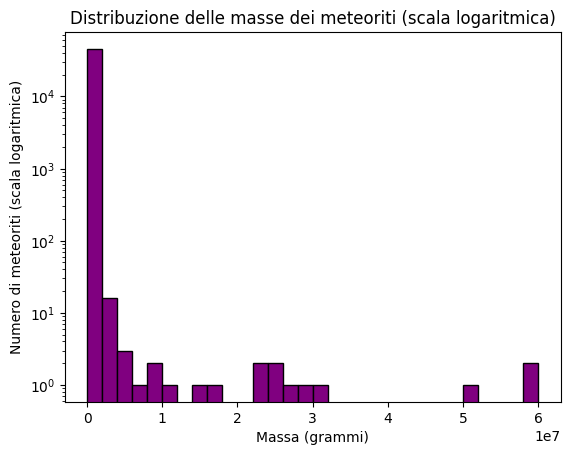

In [13]:
import matplotlib.pyplot as plt

masse = []

for m in meteoriti:
  valore = m["mass"]
  masse.append(valore)

plt.figure()
plt.hist(masse, bins = 30, color = "purple", edgecolor = 'black', log = True)
plt.title("Distribuzione delle masse dei meteoriti (scala logaritmica)")
plt.xlabel("Massa (grammi)")
plt.ylabel("Numero di meteoriti (scala logaritmica)")
plt.show()

In [ ]:
import folium
import math
from folium.plugins import MarkerCluster

zoom = 2
coordinate = []

for m in meteoriti:
  lat = m.get("lat")
  lon = m.get("long")
  if lat is not None and lon is not None and not math.isnan(lat) and not math.isnan(lon):
    coordinate.append((lat, lon, m))

if coordinate:
    print(f"Trovate {len(coordinate)} coordinate valide di meteoriti. Generazione della mappa in corso...")
    media_lat = sum(c[0] for c in coordinate) / len(coordinate)
    media_lon = sum(c[1] for c in coordinate) / len(coordinate)

    mappa = folium.Map(location = [media_lat, media_lon], zoom_start = zoom, tiles = "OpenStreetMap")

    marker_cluster = MarkerCluster().add_to(mappa)

    for lat, lon, m in coordinate:
      nome = m.get("name")
      massa = m.get("mass")
      anno = m.get("year")

      popup_html = f"<b>Nome:</b> {nome}<br>"
      if massa is not None and not math.isnan(massa):
          popup_html += f"<b>Massa:</b> {massa} g<br>"
      if anno is not None and not math.isnan(anno):
          popup_html += f"<b>Anno:</b> {int(anno)}<br>"

      folium.Marker(
          location = [lat, lon],
          popup = popup_html
      ).add_to(marker_cluster)

    file = "mappa_meteoriti.html"
    mappa.save(file)
    print(f"Mappa salvata con successo in {file}.")
else:
    print("Nessuna coordinata valida trovata per visualizzare i meteoriti sulla mappa.")


Trovate 38401 coordinate valide di meteoriti. Generazione della mappa in corso...
